In [20]:
import pandas
import seaborn as sns
#Params
population_size=50
#Summarizes collected data, combining all indivs' from 1 generation.
def summarize_across_generations(dataframe):
    compressed_frame = dataframe.copy()
    compressed_frame.drop(compressed_frame.index, inplace=True)
    
    previous_generation = 0
    
    #Adding the first row
    compressed_frame.loc[previous_generation]=[0 for n in range(len(dataframe.columns))]
    population_counter = 0
    for indiv_count in range(len(dataframe)):
        #if indiv_count%population_size == 0:
        current_generation = dataframe["Generation"][indiv_count]
        if current_generation!=previous_generation:
            #Summarizing the previous row.
            compressed_frame.loc[previous_generation]/=population_counter
            #Adding a new row for the next generation.
            compressed_frame.loc[current_generation]=[0 for n in range(len(dataframe.columns))]
            previous_generation=current_generation
            population_counter = 0
        for column in dataframe:
            individual = dataframe[column][indiv_count]
            compressed_frame.iloc[-1, compressed_frame.columns.get_loc(column)]+=individual
        population_counter+=1
    
    compressed_frame.loc[previous_generation]/=population_counter
    return compressed_frame
        

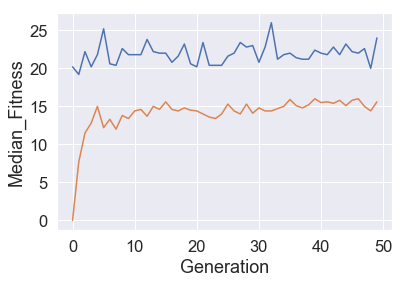

In [21]:
#Plotting Fitness: Converges VERY quickly.
results_folder = "../sep27_five_fitnesstests_per_individual_run1_battery_penalty_10/"
fitness_file = results_folder+"fitness_summary.csv"
fitness_frame = pandas.read_csv(fitness_file, sep=" ")
sns.lineplot(x="Generation", y="Best_Fitness", data=fitness_frame)
sns.lineplot(x="Generation", y="Median_Fitness", data=fitness_frame)
#sns.lineplot(x="Generation", y="StdDev", data=fitness_frame)

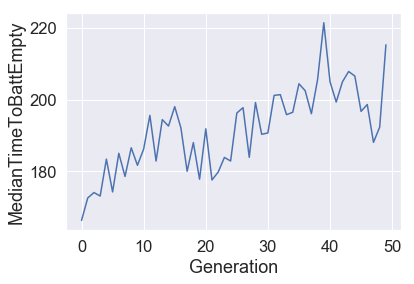

In [22]:

sns.lineplot(x="Generation", y="MedianTimeToBattEmpty", data=fitness_frame)

2503
     Battery    Poison      Food
0   0.086039  0.070665 -0.074248
1   0.041373 -0.331657  0.368831
2   0.256490 -0.508182  0.408821
3   0.228508 -0.446822  0.438545
4   0.351475 -0.407420  0.549056
5   0.072034 -0.452715  0.478376
6   0.216332 -0.305508  0.670924
7   0.223726 -0.290585  0.648432
8   0.232770 -0.400076  0.715229
9   0.196419 -0.411953  0.676270
10  0.100427 -0.409051  0.789146
11  0.178632 -0.430091  0.837203
12  0.395561 -0.465304  0.745555
13  0.374917 -0.515944  0.823444
14  0.335329 -0.549386  0.863151
15  0.502944 -0.619809  0.784162
16  0.358669 -0.536229  0.782489
17  0.398869 -0.559515  0.804083
18  0.312398 -0.576344  0.789242
19  0.461130 -0.504908  0.663829
20  0.436617 -0.403004  0.814221
21  0.349149 -0.551440  0.721010
22  0.406825 -0.490677  0.721510
23  0.368747 -0.440709  0.698250
24  0.200002 -0.455712  0.846101
25  0.324907 -0.524756  0.870413
26  0.376551 -0.497050  0.743395
27  0.365225 -0.536213  0.790153
28  0.360974 -0.573452  0.909384
29  0

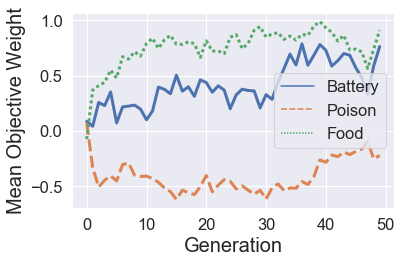

In [23]:
nn_output_file = results_folder+"/nn_outputs_summary.csv"

import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

#Plotting NN outputs (that is, objective values) over generations.
nn_out_frame = pandas.read_csv(nn_output_file, sep=" ")#, header=0, names=["Ammo", "Health", "Frags"])
#nn_out_frame.rename(columns={"Ammo": "Ammunition",
#                              "Health": "Health",
#                              "Frags": "Attack"}, inplace=True)
#print(nn_out_frame)
print(len(nn_out_frame))
summmary_nn_outputs=summarize_across_generations(nn_out_frame)
#summmary_nn_outputs.drop(summmary_nn_outputs.tail(1).index,inplace=True) # drop last n rows
#print(summmary_nn_outputs)
summmary_nn_outputs=summmary_nn_outputs.drop("Generation",1) #Dropping since is same as index
print(summmary_nn_outputs)
plt.xlabel("Generation", fontsize=20)
plt.ylabel("Mean Objective Weight", fontsize=20)
ax=sns.lineplot(data=summmary_nn_outputs, linewidth = 3)
fig=ax.get_figure()
fig.tight_layout()
fig.savefig("objectives_over_generations.pdf")


## Comparing fitnesses

In [29]:
#Made with ComparePerformance.py
evolved_results = pandas.read_csv(results_folder+"evolved_result_summary.csv")
hardcoded_results = pandas.read_csv(results_folder+"hardcoded_result_summary.csv")
evolved_results["fitness"] = evolved_results["food"]-evolved_results["poison"]
hardcoded_results["fitness"] = hardcoded_results["food"]-hardcoded_results["poison"]
print(evolved_results)

    battery  battery_picks  food  \
0         0              0     9   
1         0              4    25   
2         0              3    21   
3         0              2    21   
4        55              7    30   
5         0              1    10   
6        28              5    24   
7         0              4    19   
8        97              7    29   
9         0              0     9   
10       75              9    29   
11        2              3    30   
12        0              1    23   
13        0              2    15   
14        0              4     7   
15        0              3    18   
16        0              0    10   
17        0              0    11   
18        0              1    11   
19        0              2    24   
20       60              7    28   
21        0              3    31   
22        0              2    15   
23       48              5    31   
24        0              3    23   

                                         goal_history  num_time

In [30]:
#Combining dataframes for plotting
evo_string = ["evo" for i in range(len(evolved_results))]
evolved_results["Goal_Type"] = evo_string
hardcoded_string = ["hardcoded" for i in range(len(hardcoded_results))]
hardcoded_results["Goal_Type"] = hardcoded_string

combined_frame = pandas.concat([evolved_results,hardcoded_results])
print(combined_frame)


    battery  battery_picks  food  \
0         0              0     9   
1         0              4    25   
2         0              3    21   
3         0              2    21   
4        55              7    30   
5         0              1    10   
6        28              5    24   
7         0              4    19   
8        97              7    29   
9         0              0     9   
10       75              9    29   
11        2              3    30   
12        0              1    23   
13        0              2    15   
14        0              4     7   
15        0              3    18   
16        0              0    10   
17        0              0    11   
18        0              1    11   
19        0              2    24   
20       60              7    28   
21        0              3    31   
22        0              2    15   
23       48              5    31   
24        0              3    23   
0         0              5    19   
1        24              6  

MannwhitneyuResult(statistic=300.0, pvalue=0.4077665744958)

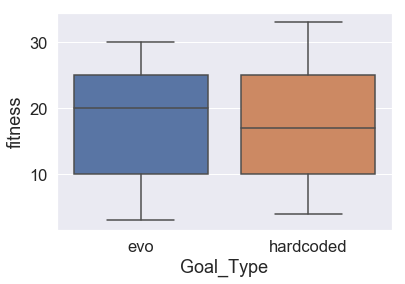

In [33]:
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
sns.boxplot(x='Goal_Type', y='fitness', data=combined_frame)
mannwhitneyu(evolved_results["fitness"], hardcoded_results["fitness"])


#fig=plot.get_figure()
#plt.ylabel("Fitness", fontsize=20)
#fig.tight_layout()
#fig.savefig('fitness_evo_vs_hardcoded', dpi=300)

MannwhitneyuResult(statistic=299.0, pvalue=0.398248304197667)

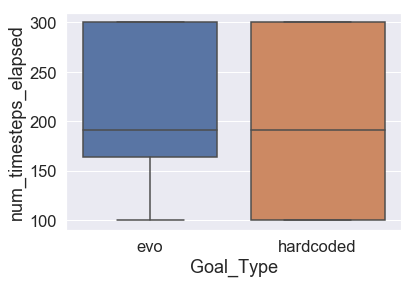

In [34]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
sns.boxplot(x='Goal_Type', y='num_timesteps_elapsed', data=combined_frame)

mannwhitneyu(evolved_results["num_timesteps_elapsed"], hardcoded_results["num_timesteps_elapsed"])

In [10]:
#Shy has objective [1,1,-1]. Ones has objective [1,1,1].
#Evolved outperforms shy. That's interesting! It must have a different
#behavior, then? YES! A dynamic one!

## Analyzing behavior

In [24]:
import numpy as np
behavior_file = results_folder+"nn_behavior_measures_to_objectives.csv"
behavior_frame = pandas.read_csv(behavior_file, sep=" ")
behavior_frame.shape
#behavior_frame.rename(columns={"m_ammo": "Current Ammunition",
#                              "m_health": "Current Health",
#                              "m_frags": "Monsters Killed",
#                              "o_ammo":"Ammunition",
#                              "o_health":"Health",
#                              "o_frags":"Attack"}, inplace=True)
print(behavior_frame)

      m_battery  m_poisons     m_food  o_battery  o_poisons  o_foods  \
0           0.0   0.000000   0.000000    1.00000   0.592444      1.0   
1           0.0   1.052632   0.000000    1.00000  -1.000000      1.0   
2           0.0   2.105263   0.000000    1.00000  -1.000000      1.0   
3           0.0   3.157895   0.000000    1.00000  -1.000000      1.0   
4           0.0   4.210526   0.000000    1.00000  -1.000000      1.0   
5           0.0   5.263158   0.000000    1.00000  -1.000000      1.0   
6           0.0   6.315789   0.000000    1.00000  -1.000000      1.0   
7           0.0   7.368421   0.000000    1.00000  -1.000000      1.0   
8           0.0   8.421053   0.000000    1.00000  -1.000000      1.0   
9           0.0   9.473684   0.000000    1.00000  -1.000000      1.0   
10          0.0  10.526316   0.000000    1.00000  -1.000000      1.0   
11          0.0  11.578947   0.000000    1.00000  -1.000000      1.0   
12          0.0  12.631579   0.000000    1.00000  -1.000000     

In [25]:
#Method for summarizing and plotting averages for 1 measurement.
def summarize_measurement_and_plot_objectives(dataframe, main_objective):
    meas_to_objectives_array = []
    unique_main_measures = dataframe[main_objective].unique()
    for unique_measure in unique_main_measures:
        #All frames with given value for the column
        sub_frame=dataframe.loc[dataframe[main_objective] == unique_measure]
        objective_means = [sub_frame["o_battery"].mean(), sub_frame["o_poisons"].mean(),sub_frame["o_foods"].mean()]
        meas_to_objectives_array.append([unique_measure,*objective_means])

    meas_to_objectives_array=np.array(meas_to_objectives_array)
    df = pandas.DataFrame(meas_to_objectives_array, columns=[main_objective, 'o_battery', 'o_poisons', 'o_foods'])
    ax=df.plot(x=main_objective, y=['o_battery', 'o_poisons', 'o_foods'], linewidth=5)
    fig=ax.get_figure()
    plt.ylabel("Objective Weight", fontsize=20)
    fig.tight_layout()
    fig.savefig(main_objective.replace(" ","")+".pdf")


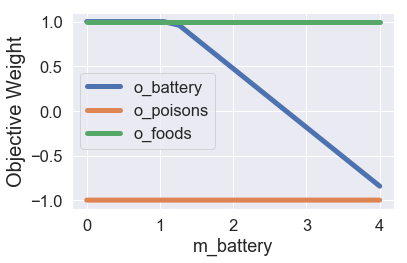

In [26]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_battery')
#KOETODO: I normalize battery by dividing by 100. In the normal case where battery capacity is 100, that means
#onlt the value between 0 and 1 below is relevant.

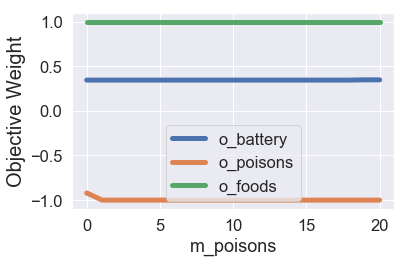

In [27]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_poisons')

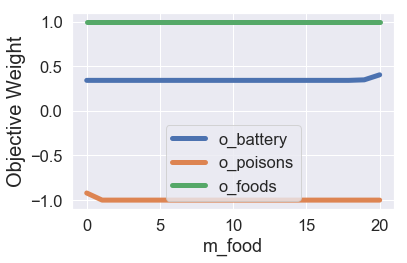

In [28]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_food')


In [ ]:
#Learns to seek battery as long as having eaten few foods. Probably a "hack" to seek batteries early,
#Then stop that later when it has enough battery anyway.
#KOE: Runime was fast! 2 hours total, but converged after 30 min, probably.